###Import python packages

In [1]:
import pickle
import os
import numpy as np
import xarray as xs
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import table
import datetime
from datetime import datetime as dt
import time
try:
  import cartopy.crs as ccrs
except:
  !pip install cartopy
  import cartopy.crs as ccrs

from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.6 MB/s eta 0:00:00
Mounted at /content/drive/


###Differentiate the storage depending on who is logged in

In [2]:
if gcloud_tokeninfo['email'] == "francesco.cocetta@cmcc.it":
  user = 'Francesco'
  data_folder = '/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/'

if gcloud_tokeninfo['email'] == "lorenzo.zampieri@cmcc.it":
  user = 'Lorenzo'
  data_folder = '/content/drive/MyDrive/2023_Cocetta_TC/pickles/'

#with open('{}totalSIA_seasonal_19930101_20201231.pkl'.format(pick_folder), 'rb') as f:
#   loaded_data_objects2 = pickle.load(f)
#print(loaded_data_objects2)

###Read the data from pickle files

In [3]:
# Total sea ice area timeseries
seasonal_file = '{}totalSIA_ts_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(seasonal_file))
file = open(seasonal_file, 'rb')
timeseries = pickle.load(file)

# Seasonal sea ice area data
seasonal_file = '{}totalSIA_seasonal_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(seasonal_file))
file = open(seasonal_file, 'rb')
seasonal_data = pickle.load(file)

# Seasonal sea ice area data – difference first to last decade
seasonal_file = '{}totalSIA_seas_DIFFSfirst_last_decades.pkl'.format(data_folder)
print('Reading: {}'.format(seasonal_file))
file = open(seasonal_file, 'rb')
seasonal_diff_data = pickle.load(file)

Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/totalSIA_ts_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/totalSIA_seasonal_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/totalSIA_seas_DIFFSfirst_last_decades.pkl


### Create the panel for paper

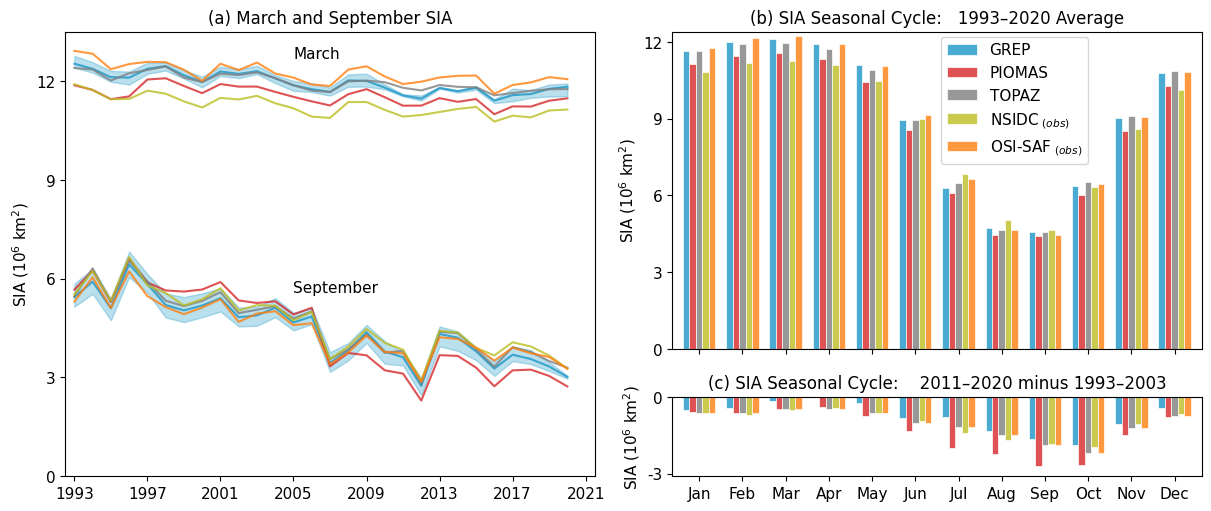

In [4]:
my_colors = ['#1B96C6','#EF767A','#456990','#49DCB1','#EEB868']
my_colors = ['#1B96C6','tab:red','tab:grey','tab:olive','tab:orange']
#my_colors = ['tab:blue', 'tab:olive', 'tab:pink', 'tab:grey', 'tab:red']


plt.rcParams.update({'font.size': 11})

gs_kw = dict(width_ratios=[1, 1], height_ratios=[4, 1])
fig, axd = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'lower right']],
                              gridspec_kw=gs_kw, figsize=(11, 5),
                              layout="constrained")

# Left plot

df = pd.DataFrame.from_dict(timeseries)
df['time'] = df['time'].astype('datetime64[ns]')
df_m = df.loc[(df['time'].dt.month==3)]
df_s = df.loc[(df['time'].dt.month==9)]

ax = axd['left']
ax.title.set_text('(a) March and September SIA')
ax.title.set_fontsize(12)
yticks = [0,3,6,9,12,15]
ylabels = ['0','3','6','9','12','15']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
xticks = [1993,1997,2001,2005,2009,2013,2017,2021]
xlabels = ['1993','1997','2001','2005','2009','2013','2017','2021']
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_xlim(1992.5,2021.5)
ax.set_ylim(0,13.5)
ax.set_ylabel('SIA (10$^6$ km$^2$)')
#ax.set_xlabel('Years')

ax.plot(range(1993,2021), df_m['GREP_mean'], '-', color=my_colors[0], alpha=0.8)
ax.plot(range(1993,2021), df_m['PIOMAS'], '-', color=my_colors[1], alpha=0.8)
ax.plot(range(1993,2021), df_m['TOPAZ'], '-', color=my_colors[2], alpha=0.8)
ax.plot(range(1993,2021), df_m['NSIDC'], '-', color=my_colors[3], alpha=0.8)
ax.plot(range(1993,2021), df_m['OSISAF'], '-', color=my_colors[4], alpha=0.8)
ax.fill_between(range(1993,2021), df_m['GREP_ensemble_max'], df_m['GREP_ensemble_min'], color=my_colors[0], alpha=0.3)
ax.text(2005,12.7,'March')

ax.plot(range(1993,2021), df_s['GREP_mean'], '-', color=my_colors[0], alpha=0.8)
ax.plot(range(1993,2021), df_s['PIOMAS'], '-', color=my_colors[1], alpha=0.8)
ax.plot(range(1993,2021), df_s['TOPAZ'], '-', color=my_colors[2], alpha=0.8)
ax.plot(range(1993,2021), df_s['NSIDC'], '-', color=my_colors[3], alpha=0.8)
ax.plot(range(1993,2021), df_s['OSISAF'], '-', color=my_colors[4], alpha=0.8)
ax.fill_between(range(1993,2021), df_s['GREP_ensemble_max'], df_s['GREP_ensemble_min'], color=my_colors[0], alpha=0.3)
ax.text(2005,5.6,'September')

# Add table with trends within the left plot
#col_labels = ['Mar','Sep']
#row_labels = ['GREP','PIOMAS','TOPAZ','NSIDC','OSI-SAF']
##table_vals = [['-0.31 $\pm$ 0.042', '-1.03 $\pm$ 0.11'], ['-0.23 $\pm$ 0.046', '-1.42 $\pm$ 0.13'], ['-0.26 $\pm$ 0.034', '-1.03 $\pm$ 0.11'], ['-0.28 $\pm$ 0.043', '-0.99 $\pm$ 0.11'], ['-0.28 $\pm$ 0.050', '-0.90 $\pm$ 0.10']]
#table_vals = [['-0.31', '-1.03'], ['-0.23', '-1.42'], ['-0.26', '-1.03'], ['-0.28', '-0.99'], ['-0.28', '-0.90']]
#my_table = ax.table(cellText=table_vals,
#                     colWidths=[0.20,0.11,0.11],
#                     rowLabels=row_labels,
#                     colLabels=col_labels,
#                     bbox=[0.15, 0.08, 0.23, 0.24],
#                     cellLoc='center')
## Fit columns
#my_table.auto_set_column_width([0, 1, 2])
## Increase the font size
##my_table.auto_set_font_size(False)
##my_table.set_fontsize(10)  # Adjust the font size as needed
## Set the frame color to gray
#for key, cell in my_table._cells.items():
#    cell.set_edgecolor('lightgray')
#    cell.set_linewidth(1)  # You can adjust the linewidth as needed
## add udm
#ax.text(1998,0.5,'$10^6$ km$^2$/decade')

# Upper right plot
ax = axd['upper right']
ax.title.set_text('(b) SIA Seasonal Cycle:   1993–2020 Average')
ax.title.set_fontsize(12)
yticks = [0,3,6,9,12,15]
ylabels = ['0','3','6','9','12','15']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]
ax.set_xticks(xticks)
ax.set_xlim(0.5,12.5)
ax.set_ylim(0,12.4)
ax.set_ylabel('SIA (10$^6$ km$^2$)')

df = pd.DataFrame({'GREP': seasonal_data['GREP'], 'PIOMAS': seasonal_data['PIOMAS'],
                   'TOPAZ': seasonal_data['TOPAZ'], 'NSIDC$_{~(obs)}$': seasonal_data['NSIDC'],
                   'OSI-SAF$_{~(obs)}$': seasonal_data['OSISAF']})
df.plot.bar(ax=ax, rot=0, figsize=(12, 5), width=0.75, color=my_colors, edgecolor='white', linewidth=0.6, alpha=0.8)
ax.get_legend().set_bbox_to_anchor((.8,.56))

# Lower right plot
ax = axd['lower right']
ax.title.set_text('(c) SIA Seasonal Cycle:    2011–2020 minus 1993–2003')
ax.title.set_fontsize(12)
yticks = [-3,0]
ylabels = ['-3','0']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
xticks = [0,1,2,3,4,5,6,7,8,9,10,11]
xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xlim(0.5,12.5)
ax.set_ylim(-3.1,0)
ax.set_ylabel('SIA (10$^6$ km$^2$)')
#ax.set_xlabel('Months')

df = pd.DataFrame({'GREP': seasonal_diff_data['GREP'], 'PIOMAS': seasonal_diff_data['PIOMAS'],
                   'TOPAZ': seasonal_diff_data['TOPAZ'], 'NSIDC': seasonal_diff_data['NSIDC'],
                   'OSI-SAF': seasonal_diff_data['OSISAF']})
df.plot.bar(ax=ax, rot=0, figsize=(12, 5), width=0.75, color=my_colors, edgecolor='white', linewidth=0.6, legend=False, alpha=0.8)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

if user == 'Francesco':
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_2.pdf')
if user == 'Lorenzo':
  plt.savefig('/content/drive/MyDrive/2023_Cocetta_TC/figures/fig_2.pdf')

plt.show()

Plot time series of Total SIA

In [ ]:
# Seasonal sea ice area data – difference first to last decade
ts_file = '{}totalSIA_ts_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
sia_ts = pickle.load(file)

Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/totalSIA_ts_19930101_20201231.pkl


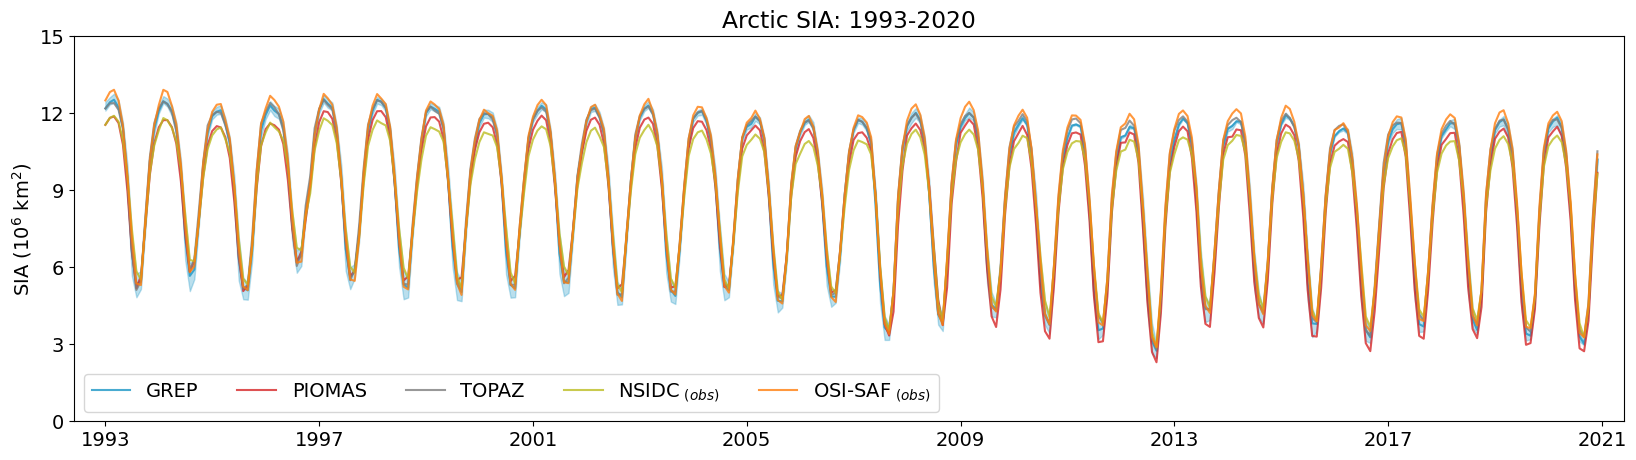

In [ ]:
import datetime

my_colors = ['#1B96C6','tab:red','tab:grey','tab:olive','tab:orange']

plt.rcParams.update({'font.size': 14})


dates_xticks = [datetime.date(1993,1,15),datetime.date(1997,1,15),datetime.date(2001,1,15),datetime.date(2005,1,15),datetime.date(2009,1,15),datetime.date(2013,1,15),datetime.date(2017,1,15),datetime.date(2021,1,15)]
labels_xticks = [ i.strftime("%Y") for i in dates_xticks ]
xmin_date = datetime.date(1992,6,15)
xmax_date = datetime.date(2021,6,15)

plt.figure(figsize=(20,5))
ax = plt.subplot()
sia_ts = pd.DataFrame.from_dict(timeseries)
sia_ts['time'] = sia_ts['time'].astype('datetime64[ns]')

#ax = axd['left']
ax.title.set_text('Arctic SIA: 1993-2020')
yticks = [0,3,6,9,12,15]
ylabels = ['0','3','6','9','12','15']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
xticks = [1993, 1997, 2001, 2005, 2009, 2013, 2017, 2021]
xlabels = ['1993','1997','2001','2005','2009','2013','2017','2021']
ax.set_xticks(dates_xticks)
ax.set_xticklabels(labels_xticks)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date)
ax.set_ylim(0,15)
ax.set_ylabel('SIA (10$^6$ km$^2$)')
#ax.set_xlabel('Years')

ax.plot(sia_ts['time'], sia_ts['GREP_mean'], '-', color=my_colors[0], alpha=0.8, label = "GREP")
ax.plot(sia_ts['time'], sia_ts['PIOMAS'],    '-', color=my_colors[1], alpha=0.8, label = "PIOMAS")
ax.plot(sia_ts['time'], sia_ts['TOPAZ'],     '-', color=my_colors[2], alpha=0.8, label = "TOPAZ")
ax.plot(sia_ts['time'], sia_ts['NSIDC'],     '-', color=my_colors[3], alpha=0.8, label = "NSIDC$_{~(obs)}$")
ax.plot(sia_ts['time'], sia_ts['OSISAF'],    '-', color=my_colors[4], alpha=0.8, label = "OSI-SAF$_{~(obs)}$")
ax.fill_between(sia_ts['time'], sia_ts['GREP_ensemble_max'], sia_ts['GREP_ensemble_min'], color=my_colors[0], alpha=0.3)
#ax.get_legend().set_bbox_to_anchor((.32,.45))
ax.legend(loc='lower left',ncol=5)

if user == 'Francesco':
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_appendix1.pdf')
if user == 'Lorenzo':
  plt.savefig('/content/drive/MyDrive/2023_Cocetta_TC/figures/fig_appendix1.pdf')

plt.show()


Plot the total thickness

In [ ]:
# Seasonal sea ice area data – difference first to last decade
ts_file = '{}total_SIT_ts_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dt = pickle.load(file)

Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/total_SIT_ts_19930101_20201231.pkl


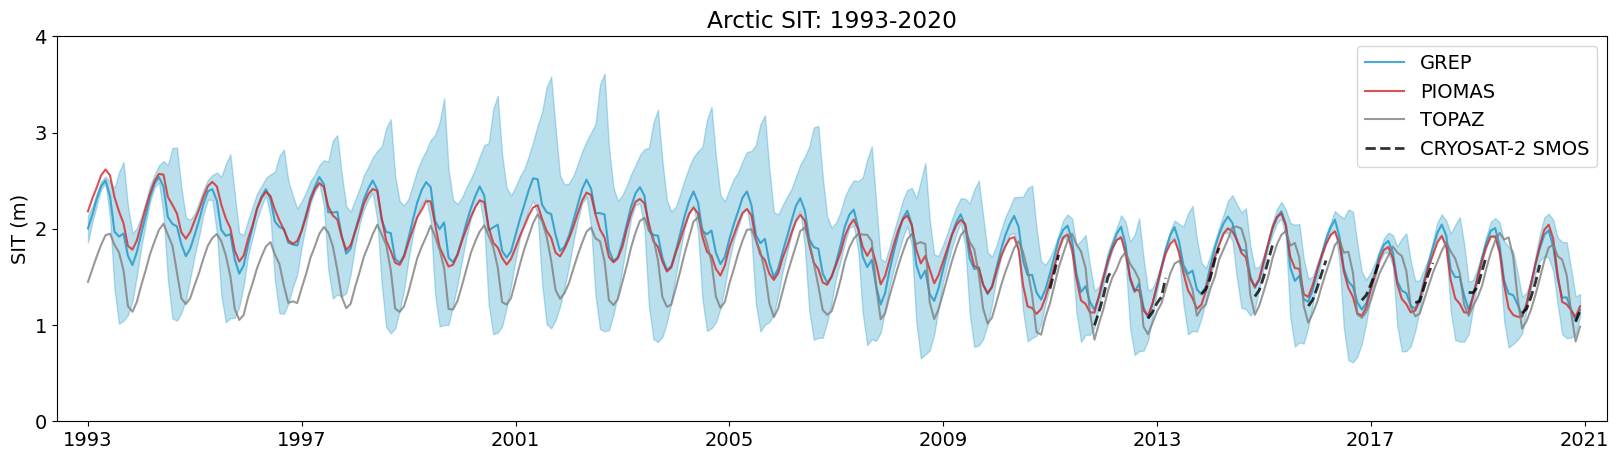

In [ ]:
import datetime

my_colors = ['#1B96C6','tab:red','tab:grey','tab:olive','tab:orange']

plt.rcParams.update({'font.size': 14})


dates_xticks = [datetime.date(1993,1,15),datetime.date(1997,1,15),datetime.date(2001,1,15),datetime.date(2005,1,15),datetime.date(2009,1,15),datetime.date(2013,1,15),datetime.date(2017,1,15),datetime.date(2021,1,15)]
labels_xticks = [ i.strftime("%Y") for i in dates_xticks ]
xmin_date = datetime.date(1992,6,15)
xmax_date = datetime.date(2021,6,15)

plt.figure(figsize=(20,5))
ax = plt.subplot()
#dt = pd.DataFrame.from_dict(timeseries)
#dt['time'] = dt['time'].astype('datetime64[ns]')

#ax = axd['left']
ax.title.set_text('Arctic SIT: 1993-2020')
yticks = [0,1,2,3,4]
ylabels = ['0','1','2','3','4']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
xticks = [1993, 1997, 2001, 2005, 2009, 2013, 2017, 2021]
xlabels = ['1993','1997','2001','2005','2009','2013','2017','2021']
ax.set_xticks(dates_xticks)
ax.set_xticklabels(labels_xticks)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date)
ax.set_ylim(0,4)
ax.set_ylabel('SIT (m)')
#ax.set_xlabel('Years')

ax.plot(dt['time'], dt['GREP_mean'], '-',  color=my_colors[0], alpha=0.8, label = "GREP")
ax.plot(dt['time'], dt['PIOMAS'],    '-',  color=my_colors[1], alpha=0.8, label = "PIOMAS")
ax.plot(dt['time'], dt['TOPAZ'],     '-',  color=my_colors[2], alpha=0.8, label = "TOPAZ")
ax.plot(dt['time'], dt['CS2SMOS'],   '--', color='black',      alpha=0.8, label = "CRYOSAT-2 SMOS", linewidth=2)
ax.fill_between(dt['time'], dt['GREP_ensemble_max'], dt['GREP_ensemble_min'], color=my_colors[0], alpha=0.3)
#ax.get_legend().set_bbox_to_anchor((.32,.45))
#ax.legend(loc='lower left',ncol=5)
ax.legend(loc='upper right')

if user == 'Francesco':
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_sit1.pdf')
if user == 'Lorenzo':
  plt.savefig('/content/drive/MyDrive/2023_Cocetta_TC/figures/fig_sit1.pdf')

plt.show()

Plot scatterplots SIT vs SIA

In [ ]:
# Read pickles
ts_file = '{}scatter_GREP_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtg = pickle.load(file)

ts_file = '{}scatter_PIOMAS_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtp = pickle.load(file)

ts_file = '{}scatter_TOPAZ_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtt = pickle.load(file)

Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/scatter_GREP_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/scatter_PIOMAS_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/scatter_TOPAZ_19930101_20201231.pkl


In [ ]:
dtg['Jan'][0],dtg['Jan'][1]

(array([1.2192499e+13, 1.2093375e+13, 1.1885612e+13, 1.1936258e+13,
        1.2126274e+13, 1.2090204e+13, 1.2001171e+13, 1.1617436e+13,
        1.1778070e+13, 1.1661046e+13, 1.1825262e+13, 1.1794467e+13,
        1.1475196e+13, 1.1251208e+13, 1.1342719e+13, 1.1488838e+13,
        1.1471458e+13, 1.1244546e+13, 1.1052146e+13, 1.1066272e+13,
        1.0974317e+13, 1.1394548e+13, 1.1573426e+13, 1.1111257e+13,
        1.0886481e+13, 1.1107188e+13, 1.1342585e+13, 1.1400717e+13],
       dtype=float32),
 array([2.0048656, 1.9538538, 1.9392366, 1.8370565, 1.9925213, 1.9816083,
        1.9060234, 1.8908476, 1.9361573, 1.927448 , 1.8633846, 1.7703407,
        1.8921304, 1.7645957, 1.6558747, 1.5693542, 1.5810666, 1.5973705,
        1.5349792, 1.4766848, 1.4080418, 1.6119995, 1.6547126, 1.5541697,
        1.393019 , 1.4653234, 1.5016353, 1.4233333], dtype=float32))

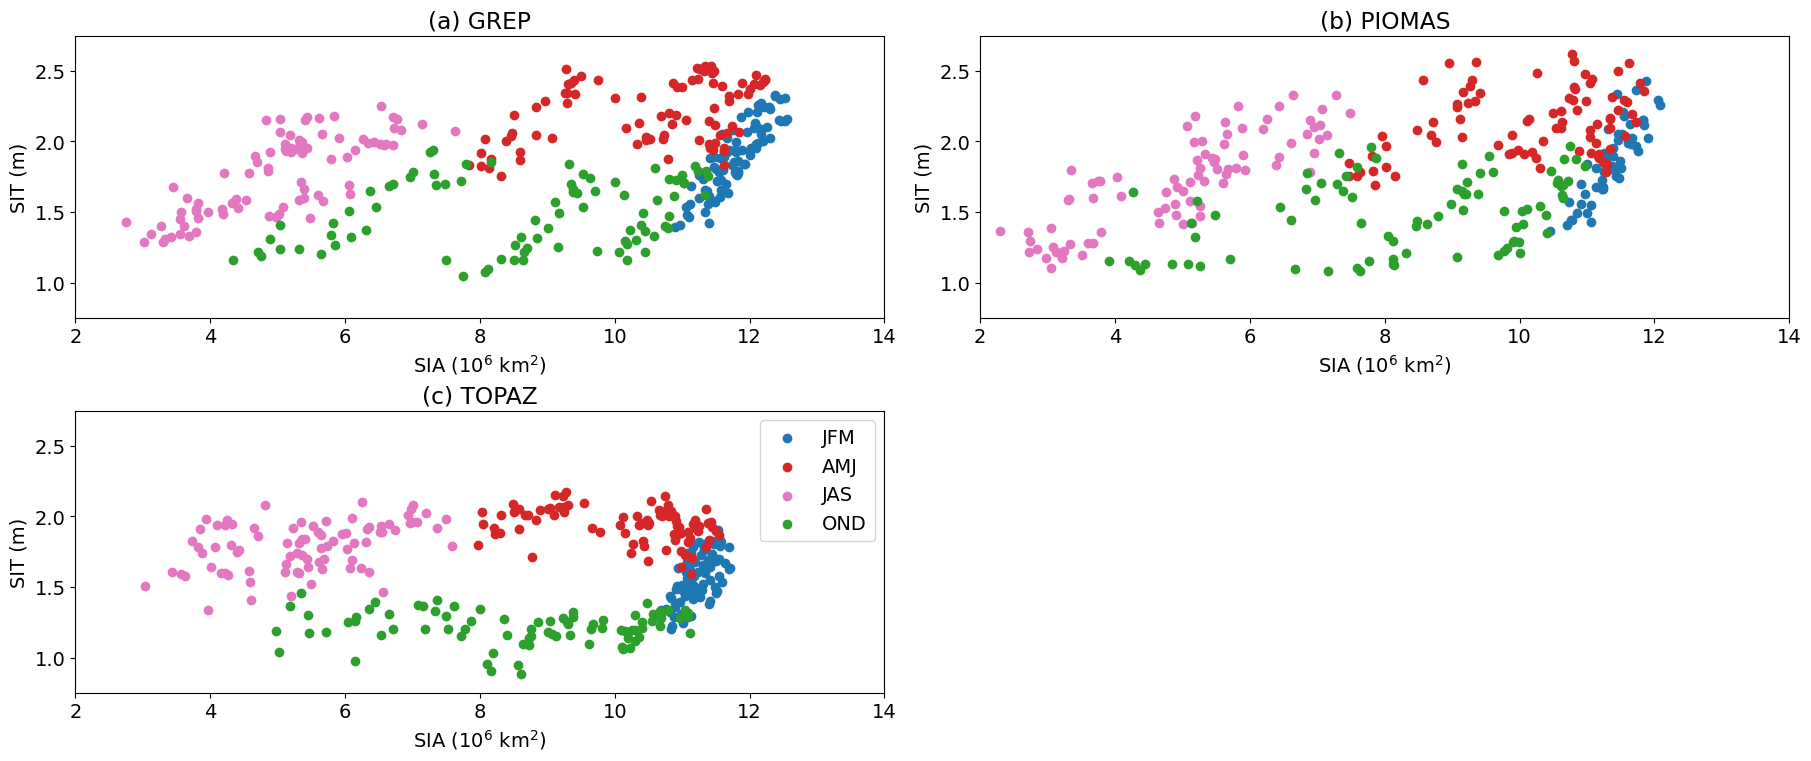

In [ ]:
import datetime
plt.rcParams.update({'font.size': 14})

gs_kw = dict(width_ratios=[1, 1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['top1', 'top2'],
                               ['bottom1', 'bottom2']],
                              gridspec_kw=gs_kw, figsize=(18, 7.5),
                              layout="constrained")

axd['bottom2'].set_visible(False)


mm_str = [datetime.date(1,i,1).strftime("%b") for i in range(1,13)]
seas_str = ["JFM", "AMJ", "JAS", "OND"]
color_palette = [ '#1f77b4', '#d62728', '#e377c2', '#2ca02c']


ax = axd['top1']
ax.title.set_text('(a) GREP')
xticks = [2,4,6,8,10,12,14]
xlabels = ['2','4','6','8','10','12','14']
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
yticks = [1.,1.5,2.,2.5]
ylabels = ['1.0','1.5','2.0','2.5']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlim(2,14)
ax.set_ylim(0.75,2.75)
ax.set_ylabel('SIT (m)')
ax.set_xlabel('SIA (10$^6$ km$^2$)')

ax.scatter(dtg['Jan'][0]/1000000000000, dtg['Jan'][1], label=seas_str[0],      color=color_palette[0], marker='o')
ax.scatter(dtg['Feb'][0]/1000000000000, dtg['Feb'][1],                         color=color_palette[0], marker='o')
ax.scatter(dtg['Mar'][0]/1000000000000, dtg['Mar'][1],                         color=color_palette[0], marker='o')
ax.scatter(dtg['Apr'][0]/1000000000000, dtg['Apr'][1], label=seas_str[1],      color=color_palette[1], marker='o')
ax.scatter(dtg['May'][0]/1000000000000, dtg['May'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtg['Jun'][0]/1000000000000, dtg['Jun'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtg['Jul'][0]/1000000000000, dtg['Jul'][1], label=seas_str[2],      color=color_palette[2], marker='o')
ax.scatter(dtg['Aug'][0]/1000000000000, dtg['Aug'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtg['Sep'][0]/1000000000000, dtg['Sep'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtg['Oct'][0]/1000000000000, dtg['Oct'][1], label=seas_str[3],      color=color_palette[3], marker='o')
ax.scatter(dtg['Nov'][0]/1000000000000, dtg['Nov'][1],                         color=color_palette[3], marker='o')
ax.scatter(dtg['Dec'][0]/1000000000000, dtg['Dec'][1],                         color=color_palette[3], marker='o')


ax = axd['top2']
ax.title.set_text('(b) PIOMAS')
xticks = [2,4,6,8,10,12,14]
xlabels = ['2','4','6','8','10','12','14']
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
yticks = [1.,1.5,2.,2.5]
ylabels = ['1.0','1.5','2.0','2.5']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlim(2,14)
ax.set_ylim(0.75,2.75)
ax.set_ylabel('SIT (m)')
ax.set_xlabel('SIA (10$^6$ km$^2$)')

ax.scatter(dtp['Jan'][0]/1000000000000, dtp['Jan'][1], label=seas_str[0],      color=color_palette[0], marker='o')
ax.scatter(dtp['Mar'][0]/1000000000000, dtp['Mar'][1],                         color=color_palette[0], marker='o')
ax.scatter(dtp['Apr'][0]/1000000000000, dtp['Apr'][1], label=seas_str[1],      color=color_palette[1], marker='o')
ax.scatter(dtp['May'][0]/1000000000000, dtp['May'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtp['Jun'][0]/1000000000000, dtp['Jun'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtp['Jul'][0]/1000000000000, dtp['Jul'][1], label=seas_str[2],      color=color_palette[2], marker='o')
ax.scatter(dtp['Aug'][0]/1000000000000, dtp['Aug'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtp['Sep'][0]/1000000000000, dtp['Sep'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtp['Oct'][0]/1000000000000, dtp['Oct'][1], label=seas_str[3],      color=color_palette[3], marker='o')
ax.scatter(dtp['Nov'][0]/1000000000000, dtp['Nov'][1],                         color=color_palette[3], marker='o')
ax.scatter(dtp['Dec'][0]/1000000000000, dtp['Dec'][1],                         color=color_palette[3], marker='o')


ax = axd['bottom1']
ax.title.set_text('(c) TOPAZ')
xticks = [2,4,6,8,10,12,14]
xlabels = ['2','4','6','8','10','12','14']
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
yticks = [1.,1.5,2.,2.5]
ylabels = ['1.0','1.5','2.0','2.5']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlim(2,14)
ax.set_ylim(0.75,2.75)
ax.set_ylabel('SIT (m)')
ax.set_xlabel('SIA (10$^6$ km$^2$)')

ax.scatter(dtt['Jan'][0]/1000000000000, dtt['Jan'][1], label=seas_str[0],      color=color_palette[0], marker='o')
ax.scatter(dtt['Feb'][0]/1000000000000, dtt['Feb'][1],                         color=color_palette[0], marker='o')
ax.scatter(dtt['Mar'][0]/1000000000000, dtt['Mar'][1],                         color=color_palette[0], marker='o')
ax.scatter(dtt['Apr'][0]/1000000000000, dtt['Apr'][1], label=seas_str[1],      color=color_palette[1], marker='o')
ax.scatter(dtt['May'][0]/1000000000000, dtt['May'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtt['Jun'][0]/1000000000000, dtt['Jun'][1],                         color=color_palette[1], marker='o')
ax.scatter(dtt['Jul'][0]/1000000000000, dtt['Jul'][1], label=seas_str[2],      color=color_palette[2], marker='o')
ax.scatter(dtt['Aug'][0]/1000000000000, dtt['Aug'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtt['Sep'][0]/1000000000000, dtt['Sep'][1],                         color=color_palette[2], marker='o')
ax.scatter(dtt['Oct'][0]/1000000000000, dtt['Oct'][1], label=seas_str[3],      color=color_palette[3], marker='o')
ax.scatter(dtt['Nov'][0]/1000000000000, dtt['Nov'][1],                         color=color_palette[3], marker='o')
ax.scatter(dtt['Dec'][0]/1000000000000, dtt['Dec'][1],                         color=color_palette[3], marker='o')
ax.legend(loc='upper right')#, bbox_to_anchor=(1.15, 0.5))


if user == 'Francesco':
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_scatter.pdf')
if user == 'Lorenzo':
  plt.savefig('/content/drive/MyDrive/2023_Cocetta_TC/figures/fig_scatter.pdf')

plt.show()



Scatter plots

In [ ]:
# Read pickles
ts_file = '{}stackedplot_GREP_full_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtgf = pickle.load(file)

ts_file = '{}stackedplot_GREP_Sep_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtgs = pickle.load(file)

ts_file = '{}stackedplot_GREP_Mar_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtgm = pickle.load(file)

ts_file = '{}stackedplot_PM_Sep_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtps = pickle.load(file)

ts_file = '{}stackedplot_PM_full_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtpf = pickle.load(file)

ts_file = '{}stackedplot_TOPAZ_full_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dttf = pickle.load(file)

ts_file = '{}stackedplot_TOPAZ_Sep_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtts = pickle.load(file)

ts_file = '{}stackedplot_PM_Mar_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dtpm = pickle.load(file)

ts_file = '{}stackedplot_TOPAZ_Mar_19930101_20201231.pkl'.format(data_folder)
print('Reading: {}'.format(ts_file))
file = open(ts_file, 'rb')
dttm = pickle.load(file)

Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_GREP_full_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_GREP_Sep_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_GREP_Mar_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_PM_Sep_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_PM_full_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_TOPAZ_full_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_TOPAZ_Sep_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_PM_Mar_19930101_20201231.pkl
Reading: /content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Pickles/stackedplot_TOPAZ_

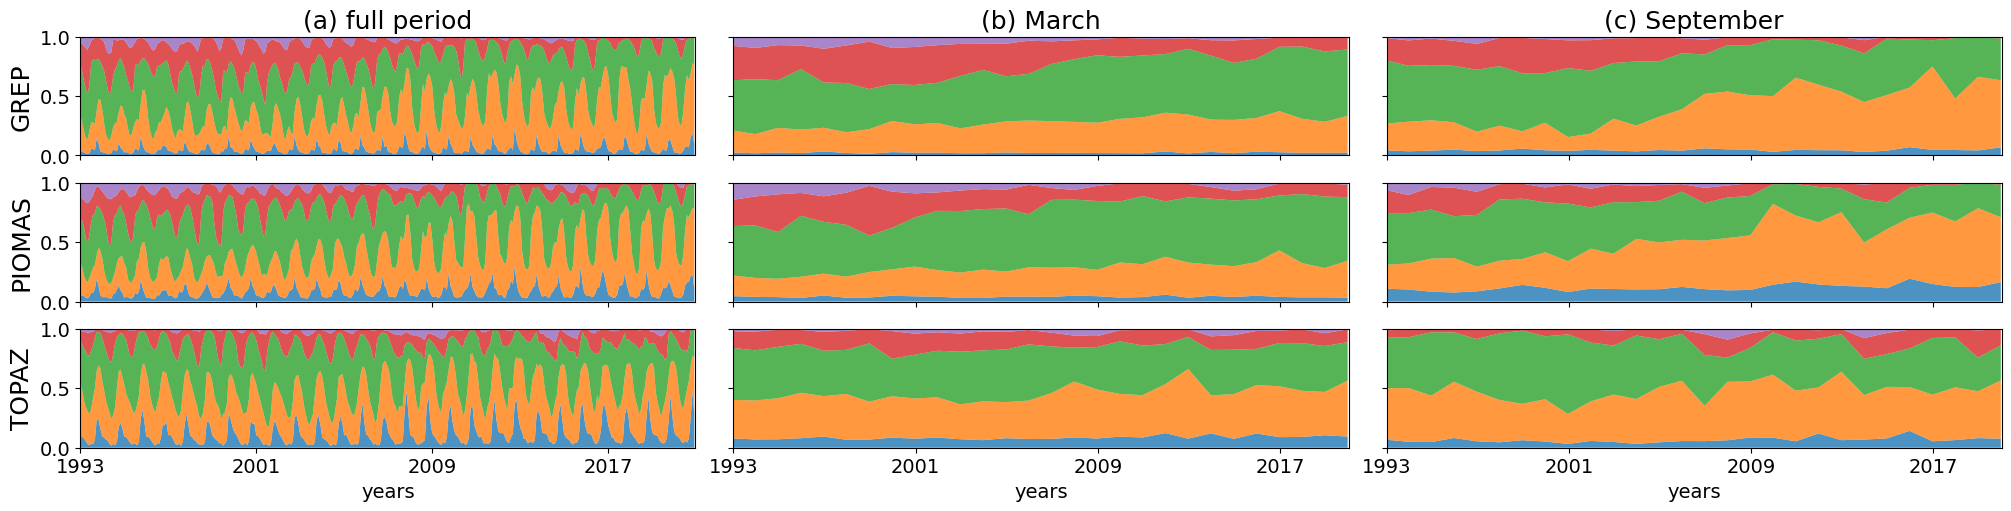

In [ ]:
cat = (0, 0.5, 1.5, 2.5, 3.5)
labs = [str(cat[0])+' to '+str(cat[1])+' m', str(cat[1])+' to '+str(cat[2])+' m', str(cat[2])+' to '+str(cat[3])+' m', str(cat[3])+' to '+str(cat[4])+' m', 'greater than '+str(cat[4])+' m']
labs = [str(cat[0])+'$-$'+str(cat[1])+' m', str(cat[1])+'$-$'+str(cat[2])+' m', str(cat[2])+'$-$'+str(cat[3])+' m', str(cat[3])+'$-$'+str(cat[4])+' m', '$>$'+str(cat[4])+' m']


plt.rcParams.update({'font.size': 14})


ylab = "fraction of total SIA"
l1_fig1  = 0
l2_fig1  = 1
xmin_date = datetime.date(1993,1,15)
xmax_date = datetime.date(2021,1,1)
xmax_date_month = datetime.date(2020,1,15)
#dates_xticks = [datetime.date(1993,1,15),datetime.date(1997,1,15),datetime.date(2001,1,15),datetime.date(2005,1,15),datetime.date(2009,1,15),datetime.date(2013,1,15),datetime.date(2017,1,15),datetime.date(2021,1,15)]
#dates_xticks_month = [datetime.date(1993,1,15),datetime.date(1997,1,15),datetime.date(2001,1,15),datetime.date(2005,1,15),datetime.date(2009,1,15),datetime.date(2013,1,15),datetime.date(2017,1,15),datetime.date(2020,1,15)]
dates_xticks = [datetime.date(1993,1,15),datetime.date(2001,1,15),datetime.date(2009,1,15),datetime.date(2017,1,15)]
dates_xticks_month = [datetime.date(1993,1,15),datetime.date(2001,1,15),datetime.date(2009,1,15),datetime.date(2017,1,15)]
labels_xticks = [ i.strftime("%Y") for i in dates_xticks ]
labels_xticks_month = [ i.strftime("%Y") for i in dates_xticks_month ]



gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])
fig, axd = plt.subplot_mosaic([['upper left',  'upper center',  'upper right'],
                               ['middle left', 'middle center', 'middle right'],
                               ['bottom left', 'bottom center', 'bottom right']],
                              gridspec_kw=gs_kw, figsize=(20, 5),
                              layout="constrained")

# Top Left
ax = axd['upper left']
ax.stackplot(dtgf['ts_time_strp'],dtgf['ts_var2plot_ENS_0'],dtgf['ts_var2plot_ENS_1'],dtgf['ts_var2plot_ENS_2'],dtgf['ts_var2plot_ENS_3'],dtgf['ts_var2plot_ENS_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylabel('GREP', fontsize=18)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date)
ax.set_xticks(dates_xticks)
ax.set_xticklabels([])
map_title = '(a) full period'
ax.set_title(map_title, fontsize=18)

# Top center
ax = axd['upper center']
ax.stackplot(dtgm['time_strp'],dtgm['var2plot_ENS_Mar_0'],dtgm['var2plot_ENS_Mar_1'],dtgm['var2plot_ENS_Mar_2'],dtgm['var2plot_ENS_Mar_3'],dtgm['var2plot_ENS_Mar_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels([])
map_title = '(b) March'
ax.set_title(map_title, fontsize=18)
ax.set_yticklabels([])

# Top right
ax = axd['upper right']
ax.stackplot(dtgs['time_strp'],dtgs['var2plot_ENS_Sep_0'],dtgs['var2plot_ENS_Sep_1'],dtgs['var2plot_ENS_Sep_2'],dtgs['var2plot_ENS_Sep_3'],dtgs['var2plot_ENS_Sep_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels([])
map_title = '(c) September'
ax.set_title(map_title, fontsize=18)
ax.set_yticklabels([])

# middle Left
ax = axd['middle left']
ax.stackplot(dtpf['ts_time_strp'],dtpf['PM_ts_var2plot_0'],dtpf['PM_ts_var2plot_1'],dtpf['PM_ts_var2plot_2'],dtpf['PM_ts_var2plot_3'],dtpf['PM_ts_var2plot_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_ylabel('PIOMAS', fontsize=18)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date)
ax.set_xticks(dates_xticks)
ax.set_xticklabels([])

# middle Center
ax = axd['middle center']
ax.stackplot(dtpm['time_strp'],dtpm['PM_var2plot_Mar_0'],dtpm['PM_var2plot_Mar_1'],dtpm['PM_var2plot_Mar_2'],dtpm['PM_var2plot_Mar_3'],dtpm['PM_var2plot_Mar_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels([])
ax.set_yticklabels([])

# middle right
ax = axd['middle right']
ax.stackplot(dtps['time_strp'],dtps['PM_var2plot_Sep_0'],dtps['PM_var2plot_Sep_1'],dtps['PM_var2plot_Sep_2'],dtps['PM_var2plot_Sep_3'],dtps['PM_var2plot_Sep_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels([])
ax.set_yticklabels([])

# bottom Left
ax = axd['bottom left']
ax.stackplot(dttf['ts_time_strp'],dttf['topaz_ts_var2plot_0'],dttf['topaz_ts_var2plot_1'],dttf['topaz_ts_var2plot_2'],dttf['topaz_ts_var2plot_3'],dttf['topaz_ts_var2plot_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_ylabel('TOPAZ', fontsize=18)
ax.set_xlabel('years')
ax.set_xlim(xmin=xmin_date, xmax=xmax_date)
ax.set_xticks(dates_xticks)
ax.set_xticklabels(labels_xticks)

# Bottom Center
ax = axd['bottom center']
ax.stackplot(dttm['time_strp'],dttm['topaz_var2plot_Mar_0'],dttm['topaz_var2plot_Mar_1'],dttm['topaz_var2plot_Mar_2'],dttm['topaz_var2plot_Mar_3'],dttm['topaz_var2plot_Mar_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlabel('years')
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels(labels_xticks_month)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.55), ncol=5, handlelength=2, fontsize=14)
ax.set_yticklabels([])

# Bottom Rigth
ax = axd['bottom right']
ax.stackplot(dtts['time_strp'],dtts['topaz_var2plot_Sep_0'],dtts['topaz_var2plot_Sep_1'],dtts['topaz_var2plot_Sep_2'],dtts['topaz_var2plot_Sep_3'],dtts['topaz_var2plot_Sep_4'],labels=labs, alpha=0.8)
ax.ticklabel_format(axis="y", style="plain")
ax.set_axisbelow(True)
ax.set_ylim(l1_fig1,l2_fig1)
ax.set_xlabel('years')
ax.set_xlim(xmin=xmin_date, xmax=xmax_date_month)
ax.set_xticks(dates_xticks_month)
ax.set_xticklabels(labels_xticks_month)
ax.set_yticklabels([])


if user == 'Francesco':
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_SIcategories_b.pdf')
  #plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Paper2023_CMCC/Figs/fig_SIcategories_4legend.pdf')
if user == 'Lorenzo':
  plt.savefig('/content/drive/MyDrive/2023_Cocetta_TC/figures/fig_SIcategories.pdf')

plt.show()


In [ ]:
dttm

{'time_strp': [datetime.date(1993, 1, 1),
  datetime.date(1994, 1, 1),
  datetime.date(1995, 1, 1),
  datetime.date(1996, 1, 1),
  datetime.date(1997, 1, 1),
  datetime.date(1998, 1, 1),
  datetime.date(1999, 1, 1),
  datetime.date(2000, 1, 1),
  datetime.date(2001, 1, 1),
  datetime.date(2002, 1, 1),
  datetime.date(2003, 1, 1),
  datetime.date(2004, 1, 1),
  datetime.date(2005, 1, 1),
  datetime.date(2006, 1, 1),
  datetime.date(2007, 1, 1),
  datetime.date(2008, 1, 1),
  datetime.date(2009, 1, 1),
  datetime.date(2010, 1, 1),
  datetime.date(2011, 1, 1),
  datetime.date(2012, 1, 1),
  datetime.date(2013, 1, 1),
  datetime.date(2014, 1, 1),
  datetime.date(2015, 1, 1),
  datetime.date(2016, 1, 1),
  datetime.date(2017, 1, 1),
  datetime.date(2018, 1, 1),
  datetime.date(2019, 1, 1),
  datetime.date(2020, 1, 1)],
 'topaz_var2plot_Mar_0': array([0.07836317, 0.06964926, 0.07106362, 0.08021115, 0.09393068,
        0.06697909, 0.06875546, 0.08472832, 0.07656793, 0.08511747,
        0.0714